In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_genetic_disorders.csv to test_genetic_disorders.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_genetic_disorders.csv to train_genetic_disorders.csv


In [ ]:
test = pd.read_csv('test_genetic_disorders.csv')
train = pd.read_csv('train_genetic_disorders.csv')
data_train=train.copy()
data_test=test.copy()

In [ ]:
test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2.0,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99.0,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0.0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13.0,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99.0,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5.0,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99.0,Multiple,6.195178,normal,True,True,True,True,False


In [ ]:
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
#Checking Null Values in rows in train dataset
data_train[data_train.isnull().all(1)].shape
print("Null rows_train:",data_train[data_train.isnull().all(1)].shape[0])

Null rows_train: 1072


In [ ]:
#null values in test dataset
data_test[data_test.isnull().all(1)].shape
print("Null rows_test:",data_test[data_test.isnull().all(1)].shape[0])

Null rows_test: 173


In [ ]:
data_fea_train=data_train[data_train.isnull().all(1)!=True]

In [ ]:
data_fea_train.shape

(21011, 45)

In [ ]:
data_fea_test=data_test[data_test.isnull().all(1)!=True]

In [ ]:
data_fea_test.shape

(9290, 43)

In [ ]:
data_fea_train = data_fea_train.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])
data_fea_test = data_fea_test.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])

In [ ]:
print(data_fea_train.shape,data_fea_test.shape)

(21011, 33) (9290, 31)


In [ ]:
data_fea_train=data_fea_train.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_test=data_fea_test.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_train.iloc[:,-2].isnull().sum(),data_fea_train.iloc[:,-1].isnull().sum()

(2049, 2068)

In [ ]:
data_fea_train.head()

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
data_fea_test = data_fea_test.rename(columns={"Genes in mother's side":'defective_mother',"Inherited from father":'defective_father',"Maternal gene":'maternal_gene',"Paternal gene":'paternal_gene',"White Blood cell count (thousand per microliter)":'WBC Count'})

In [ ]:
data_fea_train=data_fea_train[(data_fea_train['genetic_disorder'].isnull()!=True)&(data_fea_train['disorder_subclass'].isnull()!=True)]

In [ ]:
data_fea_train.shape

(17160, 33)

In [ ]:
x = data_fea_train.iloc[:,:-2]
y1 = data_fea_train.iloc[:,-2]
y2 = data_fea_train.iloc[:,-1]

In [ ]:
x.shape,y1.shape,y2.shape

((17160, 31), (17160,), (17160,))

In [ ]:
x_test = data_fea_test

In [ ]:
for i in x_test.columns:
  print(i)

patient_age
defective_mother
defective_father
maternal_gene
paternal_gene
blood_cell_count
mother_age
father_age
Status
respiratory_rate
heart_rate
follow_up
Gender
birth_asphyxia
birth_defect_autopsy
birth_place
folic_acid_periconceptional
maternal_illness
radiation_exposure
substance_abuse
assisted_conception
previous_pregnancy_anomalies
num_previous_abortion
birth_defects
WBC_count
blood_test_result
Symptom 1
Symptom 2
Symptom 3
Symptom 4
Symptom 5


In [ ]:
x_test[i].dtype

dtype('O')

In [ ]:
x

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
x[i].dtype

dtype('float64')

In [ ]:

#dissimilar datatype to one
for i in x_test.columns:
    if x_test[i].dtype != x[i].dtype:
        x_test[i]=x_test[i].astype(x[i].dtype.name)

In [ ]:
# Data Cleaning
x_test=x_test.replace('-99',np.nan)
# Cleaning_data
# replace '-' with other values
x['radiation_exposure']=x['radiation_exposure'].replace('-','others')
x['substance_abuse']=x['substance_abuse'].replace('-','others')
# Cleaning_data
x_test['radiation_exposure']=x_test['radiation_exposure'].replace('-','others')
x_test['substance_abuse']=x_test['substance_abuse'].replace('-','others')

In [ ]:
x_test['WBC_count']=x_test['WBC_count'].mask(x_test['WBC_count']<0,np.nan)
x_test['num_previous_abortion']=x_test['num_previous_abortion'].mask(x_test['num_previous_abortion']<0,np.nan)

In [ ]:
X_train1,X_val1,y_train1,y_val1= train_test_split(x,y1,stratify=y1,test_size=0.20)

In [ ]:
X_train2,X_val2,y_train2,y_val2= train_test_split(x,y2,stratify=y2,test_size=0.20)

In [ ]:
print(X_train1.shape,X_val1.shape,y_train1.shape,y_val1.shape)
print(X_train2.shape,X_val2.shape,y_train2.shape,y_val2.shape)

(13728, 31) (3432, 31) (13728,) (3432,)
(13728, 31) (3432, 31) (13728,) (3432,)


In [ ]:
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')
imp_mode_num=SimpleImputer(strategy='most_frequent')
imp_median=SimpleImputer(strategy='median')

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
for i in x.columns:
    if (x[i].dtype.name!='object')&(x[i].nunique()<=3):
        imp_mode_num.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode_num.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode_num.transform(np.array(X_val1[i]).reshape(-1,1))
        x_test[i]=imp_mode_num.transform(np.array(x_test[i]).reshape(-1,1))
    elif (x[i].dtype.name!='object')&(x[i].nunique()>3):
        imp_median.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_median.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_median.transform(np.array(X_val1[i]).reshape(-1,1))
        x_test[i]=imp_median.transform(np.array(x_test[i]).reshape(-1,1))
    else:
        imp_mode.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode.transform(np.array(X_val1[i]).reshape(-1,1))
        x_test[i]=imp_mode.transform(np.array(x_test[i]).reshape(-1,1))

In [ ]:
X_train1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_val1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
x_test.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler
ord_enc=OrdinalEncoder()
ohe_enc=OneHotEncoder()
min_max=MinMaxScaler()

In [ ]:
X_train1.reset_index(inplace=True)
X_val1.reset_index(inplace=True)

In [ ]:
# encoding the features
for i in x.columns:
    if (x[i].dtype.name=='object'):
        if i in x and x[i].nunique()<=2:
            ord_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_train1.loc[:,i]=ord_enc.transform(np.array(X_train1[i]).reshape(-1,1))
            X_val1.loc[:,i]=ord_enc.transform(np.array(X_val1[i]).reshape(-1,1))
            x_test.loc[:,i]=ord_enc.transform(np.array(x_test[i]).reshape(-1,1))
        else:
            ohe_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_encode_tr1=pd.DataFrame(ohe_enc.transform(np.array(X_train1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode_va1=pd.DataFrame(ohe_enc.transform(np.array(X_val1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode1=pd.DataFrame(ohe_enc.transform(np.array(x_test[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_train1=pd.concat([X_train1,X_encode_tr1],axis=1)
            X_val1=pd.concat([X_val1,X_encode_va1],axis=1)
            X_test=pd.concat([x_test,X_encode1],axis=1)
            X_train1.drop(columns=[i],inplace=True)
            X_val1.drop(columns=[i],inplace=True)
            X_test.drop(columns=[i],inplace=True)

<ipython-input-44-47e5ceb2eae5>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train1.loc[:,i]=ord_enc.transform(np.array(X_train1[i]).reshape(-1,1))
<ipython-input-44-47e5ceb2eae5>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_val1.loc[:,i]=ord_enc.transform(np.array(X_val1[i]).reshape(-1,1))
<ipython-input-44-47e5ceb2eae5>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

In [ ]:
X_train1.shape,X_val1.shape,x_test.shape

((13728, 49), (3432, 49), (9290, 31))

<ipython-input-46-cb80c6e22cc5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(test['Patient Age'], color = 'red')
<ipython-input-46-cb80c6e22cc5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(test['Blood cell count (mcL)'], color = 'blue')
<ipython-input-46-cb80c6e22cc5>:5: UserW

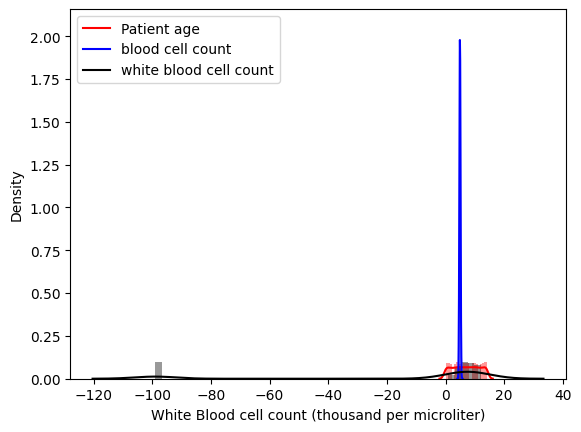

In [ ]:
from scipy.stats import skew, norm
import seaborn as sns
ax = sns.distplot(test['Patient Age'], color = 'red')
ax = sns.distplot(test['Blood cell count (mcL)'], color = 'blue')
ax = sns.distplot(test['White Blood cell count (thousand per microliter)'], color = 'black')
plt.legend(['Patient age','blood cell count','white blood cell count'])

<Axes: xlabel='White Blood cell count (thousand per microliter)', ylabel='Blood cell count (mcL)'>

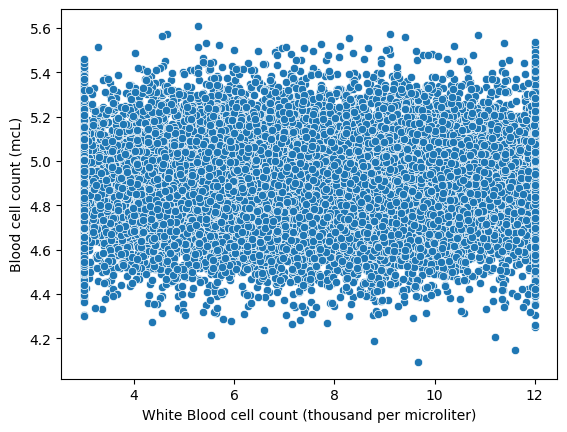

In [ ]:
sns.scatterplot(data = train, x = 'White Blood cell count (thousand per microliter)',y ='Blood cell count (mcL)')

<Axes: xlabel='Patient Age', ylabel='Blood cell count (mcL)'>

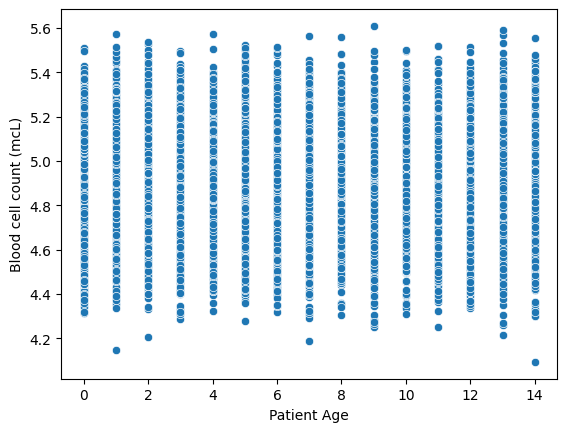

In [ ]:
sns.scatterplot(data = train, x = 'Patient Age',y ='Blood cell count (mcL)')

<Axes: xlabel='Patient Age', ylabel='White Blood cell count (thousand per microliter)'>

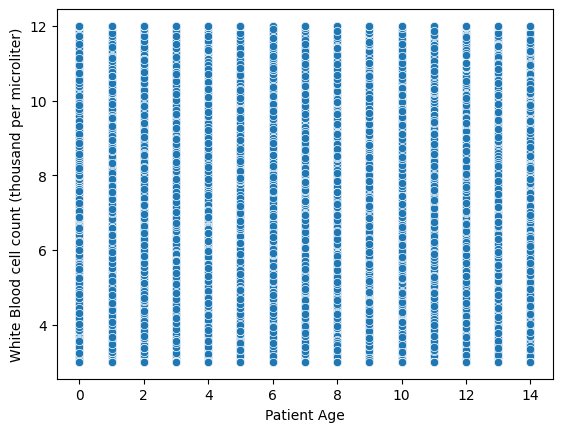

In [ ]:
sns.scatterplot(data = train, y = 'White Blood cell count (thousand per microliter)',x ='Patient Age')

<ipython-input-50-d8440af25e92>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Mother's age"], fit = norm)


<Axes: xlabel="Mother's age", ylabel='Density'>

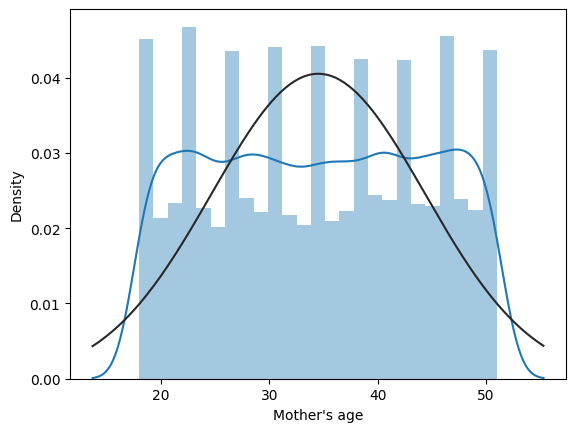

In [ ]:
sns.distplot(train["Mother's age"], fit = norm)

<ipython-input-51-506a3c17b11c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['No. of previous abortion'])


<Axes: xlabel='No. of previous abortion', ylabel='Density'>

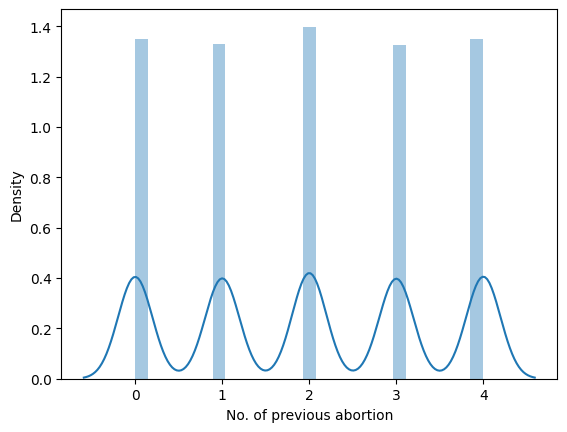

In [ ]:
sns.distplot(train['No. of previous abortion'])

In [ ]:
X_train1.drop(columns='index',inplace=True)
X_val1.drop(columns='index',inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Transform features by scaling each feature to a given range MinMaxScaler
min_max=MinMaxScaler()
X2=min_max.fit_transform(X_train1)

In [ ]:
X2=pd.DataFrame(X2,columns=X_train1.columns)

In [ ]:
#normalised val1
X2_val=min_max.transform(X_val1)
X2_val=pd.DataFrame(X2_val,columns=X_val1.columns)

In [ ]:
lab_enc1=LabelEncoder()
y1_en=lab_enc1.fit_transform(y_train1)
y1_en_val=lab_enc1.transform(y_val1)

In [ ]:
# printing encoded targets
np.unique(y1_en),np.unique(y1_en_val)

(array([0, 1, 2]), array([0, 1, 2]))

In [ ]:
# enoding the target variables2
lab_enc2=LabelEncoder()
y2_en=lab_enc2.fit_transform(y_train2)
y2_en_val=lab_enc2.transform(y_val2)

In [ ]:
# printing encoded targets
np.unique(y2_en),np.unique(y2_en_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [ ]:
#Genetic Disorder

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X2, pd.DataFrame(y1_en))
print(f'''shape of X before SMOTE: {X2.shape}
shape of X after SMOTE: {X_sm.shape}''')
print('balanced class (%):')
y_sm.value_counts(normalize=True) * 100

shape of X before SMOTE: (13728, 48) 
shape of X after SMOTE: (21039, 48)
balanced class (%):


0    33.333333
1    33.333333
2    33.333333
dtype: float64

In [ ]:
X_sm.head(2)

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.857143,0.0,1.0,1.0,0.0,0.568625,0.484848,0.500000,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.071429,1.0,0.0,0.0,0.0,0.547203,0.030303,0.090909,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
y1_enco=np.array(y_sm).ravel()

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
sel1=SelectKBest(chi2, k=25).fit(X_sm,y1_enco)

In [ ]:
cols=sel1.get_support(indices=True)
print(X_sm.iloc[:,cols].shape)
result_kbest_20=X_sm.iloc[:,cols]

(21039, 25)


In [ ]:
sele_fea= X2.columns[(sel1.get_support())]
print(sele_fea)

Index(['defective_mother', 'defective_father', 'maternal_gene',
       'paternal_gene', 'respiratory_rate', 'heart_rate', 'follow_up',
       'folic_acid_periconceptional', 'num_previous_abortion', 'birth_defects',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Gender_Ambiguous', 'Gender_Male', 'radiation_exposure_No',
       'radiation_exposure_Yes', 'radiation_exposure_others',
       'substance_abuse_others', 'blood_test_result_abnormal',
       'blood_test_result_inconclusive', 'blood_test_result_normal',
       'blood_test_result_slightly abnormal'],
      dtype='object')


In [ ]:
print(X2_val.iloc[:,cols].shape)
result_kbest_val=X2_val.iloc[:,cols]

(3432, 25)


In [ ]:
from sklearn.metrics import f1_score